# Agrupamento por Kmeans

## Agenda:

1. Agrupamento por K-means
2. Avaliação do Agrupamento

In [1]:
# beer dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


Como agrupar essas cervejas?

In [2]:
# TODO - definir X
X = beer[["calories","sodium","alcohol","cost"]]

## Parte 1: Agrupamento K-means

In [3]:
# K-means com 3 clusters
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)

In [4]:
# review the cluster labels
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0], dtype=int32)

In [7]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
8,Miller_Lite,99,10,4.3,0.43,0
19,Schlitz_Light,97,7,4.2,0.47,0
4,Heineken,152,11,5.0,0.77,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
2,Lowenbrau,157,15,0.9,0.48,1
10,Coors,140,18,4.6,0.44,1


What do the clusters seem to be based on? Why?

In [8]:
# TODO - review the cluster centers. What's the command?
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

#Cluster centers for 3 centroids initialized
cluster_centers = km.cluster_centers_

In [9]:
# TODO - calculate the mean of each feature for each cluster
# Group with 3 centroids initialized
beer.groupby("cluster").mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,102.75,10.0,4.075000,0.440000
1,150.00,17.0,4.521429,0.520714
2,70.00,10.5,2.600000,0.420000


In [10]:
# TODO - save the DataFrame above of cluster centers
centers = beer.groupby("cluster").mean().reset_index()

In [11]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [12]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0,0.5,'Alcohol')

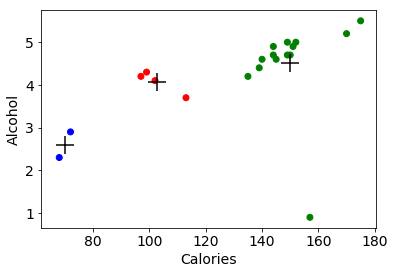

In [13]:
# TODO - scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
# hint: color in a plot is usually specified with c=array
# Hopefully plotting is becoming familiar to you now!
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster"]])
# TODO - cluster centers, marked by "+"
# Just make sure you understand this command: 
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# TODO - always remember to add labels!
plt.xlabel("Calories")
plt.ylabel("Alcohol")

## Parte 2: Avaliação do Agrupamento

O [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) é uma métrica comum para avaliação da "performance" do agrupamento em situações em que o número "correto" de agrupamentos não é conhecido.

O Silhouette Coefficient é cálculado para **cada observação**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = distância média para todos os outros pontos **do mesmo grupo**
- b = distância média para todos os outros pontos no **grupo mais próximo**

Ele varia de -1 (pior) para 1 (melhor). A **pontuação global** é calculada através da média de todas as observações.

In [14]:
# TODO - calculate SC for our model
from sklearn import metrics

score = metrics.silhouette_score(X,beer.cluster)
print(score)

0.673177504646


In [16]:
# TODO - calculate SC for K=2 through K=19
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.69176560340794857,
 0.67317750464557957,
 0.58570407211277953,
 0.42254873351720201,
 0.39888288049162546,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.40815990138996028,
 0.32472080133848924,
 0.34597752371272478,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.28495140011748982,
 0.23498077333071996,
 0.15880910174962809,
 0.084230513801511767]

Text(0,0.5,'Sihouette Score')

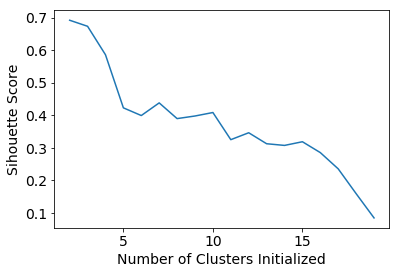

In [17]:
# TODO - plot the results (SC vs k)
# Don't forget to label!
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")